In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерация экспериментальных данных

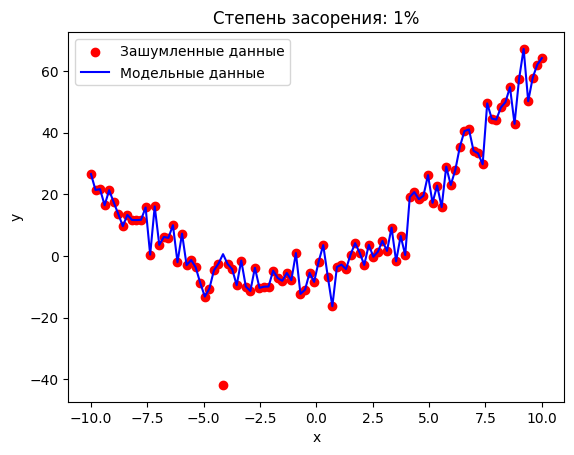

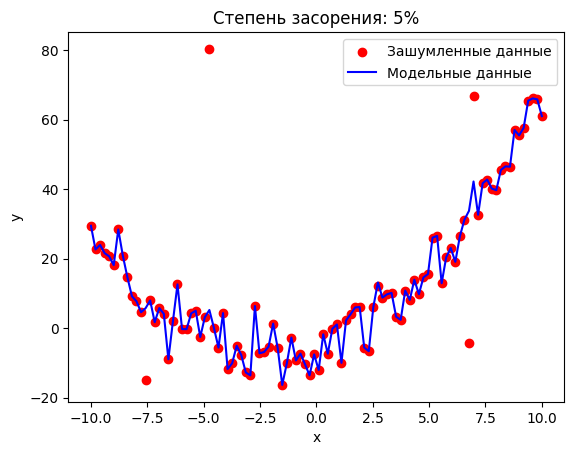

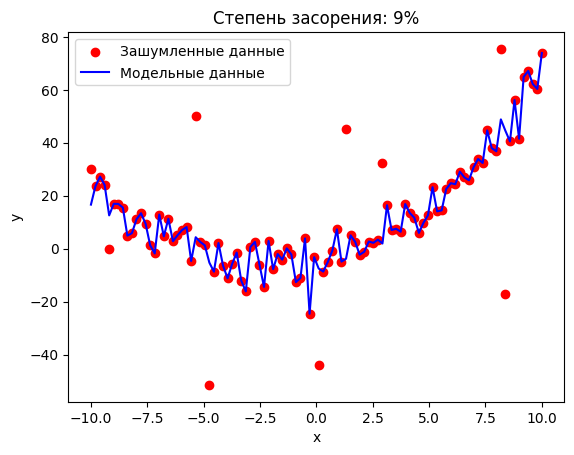

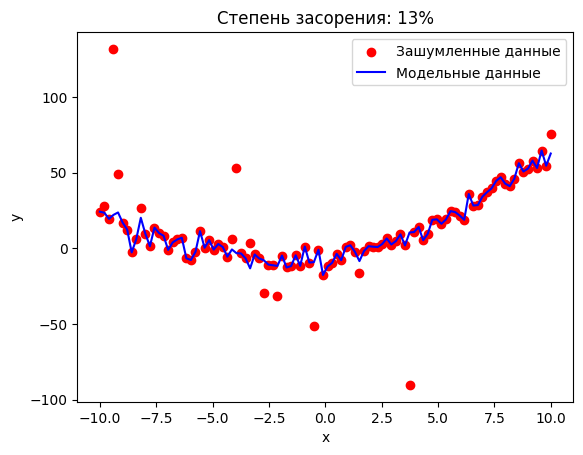

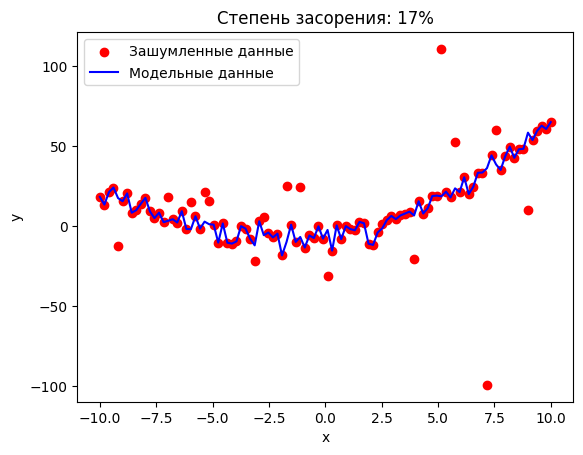

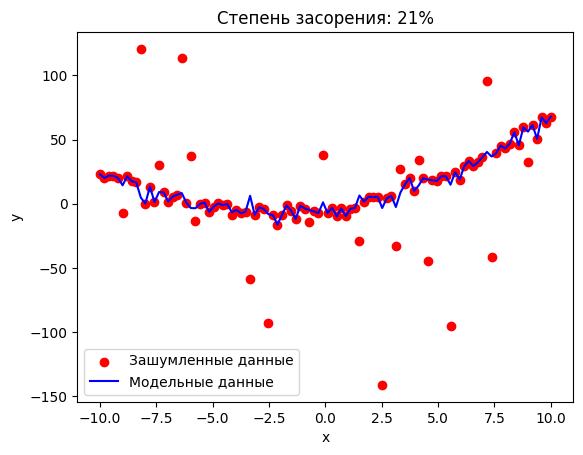

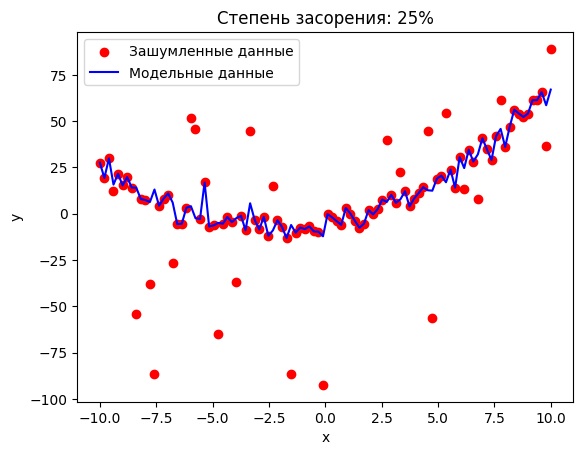

In [4]:
def generate_data(a, b, c, x, error):
    """Функция для генерации данных согласно квадратичной модели y = ax^2 + bx + c"""
    return a * x**2 + b * x + c + np.random.normal(0, error, size=x.shape)

def add_outliers(y, num_outliers, error_scale):
    """Функция для добавления выбросов в данные"""
    indices = np.random.choice(len(y), num_outliers, replace=False)
    outliers = y[indices] + np.random.normal(0, error_scale, size=(num_outliers,))
    y[indices] = outliers
    return y

def get_outliers_y() -> list[np.ndarray]:
    outliers_y = []
    
    a, b, c = 0.5, 2.0, -5.0
    x = np.linspace(-10, 10, 100)
    error = 5
    
    contamination_levels = np.arange(0.01, 0.26, 0.04)
    
    for contamination in contamination_levels:
        y_clean = generate_data(a, b, c, x, error)
        
        num_outliers = int(len(x) * contamination)
        y_with_outliers = add_outliers(y_clean.copy(), num_outliers, error_scale=10*error)
        outliers_y.append(y_with_outliers)
    return outliers_y
    
def show_samples():
    a, b, c = 0.5, 2.0, -5.0
    x = np.linspace(-10, 10, 100)
    error = 5
    
    contamination_levels = np.arange(0.01, 0.26, 0.04)
    
    for contamination in contamination_levels:
        y_clean = generate_data(a, b, c, x, error)
        
        num_outliers = int(len(x) * contamination)
        y_with_outliers = add_outliers(y_clean.copy(), num_outliers, error_scale=10*error)
        
        plt.figure()
        plt.title(f"Степень засорения: {contamination*100:.0f}%")
        plt.scatter(x, y_with_outliers, label='Зашумленные данные', color='red')
        plt.plot(x, y_clean, label='Модельные данные', color='blue')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

show_samples()

# 2. Поиск М-оценок параметров итерационным МНК 

In [75]:
def IRLS(y):
    x = np.linspace(-10, 10, 100)
    theta: list = [0] * len(y)
    r: list = [0] * len(y)
    w: list = [0] * len(y)
    z: list = [0] * len(y)
    sigma: list = [0] * len(y)
    c: float = 1000
    X: np.ndarray = np.ones([100, 3])
    w_ = np.diag(np.full(100, 1))
    print(w_)

    theta[0] = np.array([[1], [1], [1], [1]])
    sigma[0] = np.array([[1]])
    r[0] = np.array([y[0]]) - np.array([[x[0] ** 2], [x[0]], [1], [1]]).T @ theta[0]
    z[0] = r[0] / sigma[0]
    w[0] = 1 if z[0] <= c else c / np.abs(z[0])
    print(X.T @ w_[0] @ X.T)
    print(np.linalg.inv(X.T @ w_[0] @ X.T))# @ X.T @ w[0] @ np.array([y[0]]))
    
    #for i in range(1, len(y)):
        #theta[i] = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y[i]
        #r[i]: float = y[i] - np.array([[x[i] ** 2], [x[i]], [1], [1]]).T @ theta[i]
        
        

In [76]:
y_1procent = get_outliers_y()[0]
IRLS(y_1procent)
#y_1procent

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional